<a href="https://colab.research.google.com/github/Blantranderozari/Blantranderozari/blob/main/HOML_10_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Image Classifier using Sequentials API

Taken from *Hands-on Machine Learning with Scikit-Learn and Tensorflow* Chap 10 page 294

The dataset Fashion MNIST are 70,000 grayscale images of 28 x 28 pixels with 10 classes 

In [6]:
import tensorflow as tf
from tensorflow import keras

# load dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one
important difference is that every image is represented as a 28×28 array rather than a
1D array of size 784. Moreover, the pixel intensities are represented as grayscale images, i.e. integers (from
0 to 255) rather than floats (from 0.0 to 255.0). 60,000 images will be used for training, while 10,000 as test

In [7]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

We are going to take first 5,000 of the training datasets as validation sets and map the pixel intensities to 0 - 1 range, by dividing them with 255. 

In [8]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

Let's look at 10 first image of the training data, starting by initiating class name of the fashion products

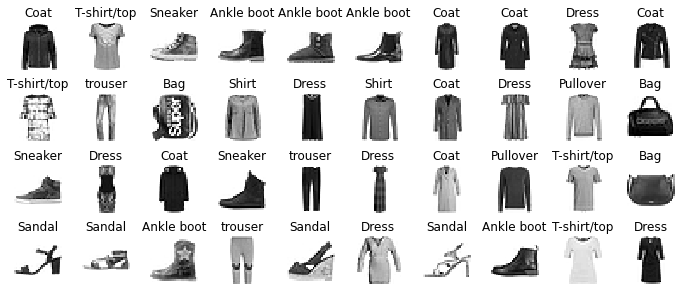

In [9]:
class_names = ["T-shirt/top", "trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

### Creating Model with Sequentials API
A classification MLP (Multi Layer Perceptron) with Input layer for 28 x 28 pixels and flattened to 784 node


In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

model.layers

The model summary below show us there are 235,500 parameters. This comes from weights + bias = (784 x 300) + 300. The same also apply to next two layers.

In [11]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["Accuracy"])

This requires some explanation. First, we use the "**sparse_categorical_crossentropy**" loss because we have sparse labels (i.e., for each instance there are probabilities of the instance belong to the class). The highest probabilities show the instances belong to that class.

If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0.,
0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead.

Regarding the optimizer, "sgd" simply means that we will train the model using simple **Stochastic Gradient Descent**.

### Train and evaluate the model

In [13]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7238 - Accuracy: 0.7662 - val_loss: 0.5540 - val_Accuracy: 0.8096
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4887 - Accuracy: 0.8301 - val_loss: 0.4687 - val_Accuracy: 0.8346
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4457 - Accuracy: 0.8453 - val_loss: 0.4232 - val_Accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4185 - Accuracy: 0.8537 - val_loss: 0.4214 - val_Accuracy: 0.8542
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3991 - Accuracy: 0.8598 - val_loss: 0.3958 - val_Accuracy: 0.8642
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3820 - Accuracy: 0.8656 - val_loss: 0.4071 - val_Accuracy: 0.8626
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3704 - Accuracy: 0.8696 - val_loss: 0.3840 - val_Accuracy:

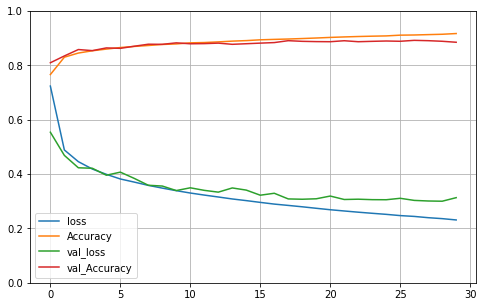

In [14]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical limit to [0,1]
plt.show()

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3491 - Accuracy: 0.8746


[0.3490801155567169, 0.8745999932289124]

### Use the model to make prediction
We use first 10 item from the test dataset

1/1 [==============================] - 0s 50ms/step


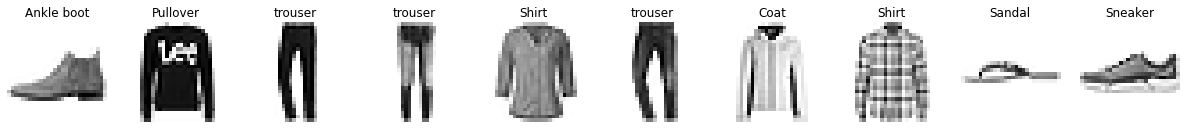

In [16]:
X_new = X_test[:10]
y_proba = model.predict(X_new);
#y_proba.round(2)

plt.figure(figsize=(21,2.4))
for index,image in enumerate(X_new):
  plt.subplot(1, 10, index + 1)
  plt.imshow(image, cmap="binary", interpolation="nearest");
  plt.axis('off')
  plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Building a Regression MLP using the Sequential API
Taken from page 303
We will use California housing data from scikit-learn

In [47]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)


Notes on the code above:
1. The **fit(data)** method is used to compute the mean and std dev for a given feature to be used further for scaling.
2. The **transform(data)** method is used to perform scaling using mean and std dev calculated coming from the fit() method above.
3. The **fit_transform()** method does both fits and transform.

So we use fit_transform on training data to get the mean and std deviation while performing the scaling at the same time. These very same mean and std deviation are used for the test data (and validation data as well).

If we use the fit_transform method on our test or validation data , we will get a new mean and variance which different from those we get from the training data. This means the model is forced to re-learn from test or validation data.

In [48]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train,y_train,epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4875 - val_loss: 0.4656

In [49]:
mse_test = model.evaluate(X_test,y_test)
mse_test

162/162 [==============================] - 0s 2ms/step - loss: 0.4009


0.400865375995636

In [50]:
X_new = X_test[:3]    # pretend that these are new instances
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 43ms/step


array([[0.40966448],
       [1.7806084 ],
       [3.283021  ]], dtype=float32)

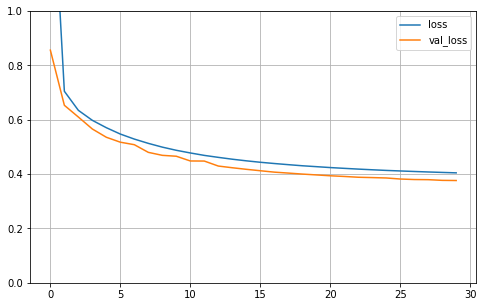

In [51]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
history.history


{'loss': [1.6418712139129639,
  0.704696536064148,
  0.6345421075820923,
  0.5977364182472229,
  0.5706290006637573,
  0.5472457408905029,
  0.5287575125694275,
  0.513012170791626,
  0.4991583228111267,
  0.48749929666519165,
  0.47773417830467224,
  0.46876275539398193,
  0.46150997281074524,
  0.45471757650375366,
  0.44877079129219055,
  0.44347068667411804,
  0.43887749314308167,
  0.43465662002563477,
  0.4306175410747528,
  0.4273228049278259,
  0.42396265268325806,
  0.42109695076942444,
  0.4183303415775299,
  0.41582560539245605,
  0.4134701192378998,
  0.4114833176136017,
  0.40956586599349976,
  0.4077361226081848,
  0.40610384941101074,
  0.40450358390808105],
 'val_loss': [0.8559520840644836,
  0.6530762910842896,
  0.609897792339325,
  0.5658424496650696,
  0.5354601740837097,
  0.5173057913780212,
  0.508107602596283,
  0.47992199659347534,
  0.46895644068717957,
  0.46563631296157837,
  0.44823727011680603,
  0.4479142129421234,
  0.42957571148872375,
  0.4232998490333